In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.read_excel(r"C:\Users\Subhadra\Documents\Python Scripts\survey.xls")

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [4]:
data=pd.read_excel(r"C:\Users\Subhadra\Documents\Python Scripts\survey.xls")

In [5]:
datac=data.copy()

In [6]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         12 non-null     object
 1   Nationality  12 non-null     object
 2   Sex          12 non-null     object
 3   Age          12 non-null     int64 
 4   Handedness   12 non-null     object
dtypes: int64(1), object(4)
memory usage: 608.0+ bytes


In [7]:
# we have 5 column variables: Name, Nationality, Sex, Age, Handedness
# we have 4 Categorical columns (Name, Nationality, Sex, Handedness) and only one Numerical data column (Age)

In [47]:
datac.describe()

,Age
count,12.000000
mean,32.833333
std,12.861736
min,18.000000
25%,22.750000
50%,31.000000
75%,38.500000
max,58.000000


# This is a clean data as there are no Null-Values

In [ ]:
# Using describe() function we can see all the data aggregarion on the only numerical data column Age

In [48]:
# To find if there are any outliers using IQR method we will first find Quartiles
x=np.percentile(datac["Age"],[25,50,75])

In [41]:
q1=x[0]
q2=x[1]
q3=x[2]
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [42]:
df.loc[df["Age"]<lb]

,Name,Nationality,Sex,Age,Handedness


In [43]:
df.loc[df["Age"]>ub]

,Name,Nationality,Sex,Age,Handedness


# There are no outliers in the give dataset

In [ ]:
# Data is for 12 members, Average age is 33 years. 
# There is a high spread in the age from the average age so we have people of varied ages
# min age is 18 and max is 58

In [49]:
datac["Nationality"].unique()

array(['USA', 'Bangadesh', 'India', 'China'], dtype=object)

In [ ]:
# In the dataset we have 4 categories in Nationality: USA, Bangladesh, India, China

In [50]:
datac["Nationality"].value_counts()

USA          4
India        3
China        3
Bangadesh    2
Name: Nationality, dtype: int64

In [ ]:
# In the dataset we have 4 USA values, 3 India Values, 3 China Values, 2 Bangladesh Values

In [51]:
datac["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [52]:
datac["Sex"].value_counts()

Male      7
Female    5
Name: Sex, dtype: int64

In [ ]:
# In the dataset we have 7 Male and 5 Females

In [53]:
datac["Handedness"].unique()

array(['Right', 'Left'], dtype=object)

In [54]:
datac["Handedness"].value_counts()

Left     7
Right    5
Name: Handedness, dtype: int64

In [ ]:
# In the dataset we have 7 people who are left handed and 5 people who are right handed

# We have people from 4 different countries who are either left handed or right    handed, this sample has both male and female population

In [ ]:
# This is not a balanced set so Bar graph will show the same
# For sample will plot the bar graph of Nationality to show the data is not balanced

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Nationality'>

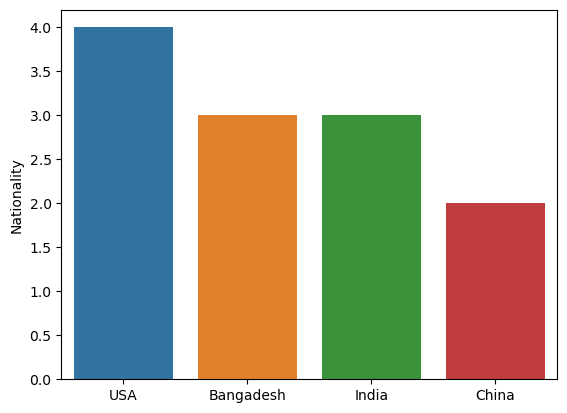

In [9]:
sns.barplot(datac["Nationality"].unique(),datac["Nationality"].value_counts())

In [ ]:
# We can further analysis on the dataset using Pivot table and crosstab
# Since we do not have a problem statement we can come up with our own problem statements
# Find how many male Indians are left handed 
# How many Females in USA are Right handed
# Average age of USA female people

In [25]:
# We can divide the dataset based on the Nationality
USA=datac.loc[datac["Nationality"]=="USA"]
Bangladesh=datac.loc[datac["Nationality"]=="Bangadesh"]
India=datac.loc[datac["Nationality"]=="India"]
China=datac.loc[datac["Nationality"]=="China"]

In [26]:
pd.crosstab(India.Sex,India.Handedness)

Handedness,Left,Right
Sex,,
Male,2,1


# Total number of male Indians who are left handed are 2

In [28]:
pd.crosstab(USA.Sex,USA.Handedness)

Handedness,Left,Right
Sex,,
Female,0,2
Male,1,1


# Total number of females in USA who are right handed are 2

In [35]:
USA

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left


In [39]:
USA.pivot_table(index="Sex",columns="Handedness",values="Age")

Handedness,Left,Right
Sex,,
Female,NaN,20.5
Male,22.0,19.0


In [40]:
# USA data based Sex and handedness
u_female=USA.pivot_table(index="Sex",columns="Handedness",values="Age")[0:1]

In [63]:
u_female["Right"]

Sex
Female    20.5
Name: Right, dtype: float64

# Average age of USA female who are right handed is 20.5

In [64]:
# Simillary if we want to Analyze all the categorical data and see counts

In [66]:
pd.crosstab(datac.Nationality,[data.Handedness,data.Sex],margins=True)

Handedness    Left       Right      All
Sex         Female Male Female Male    
Nationality                            
Bangadesh        1    1      0    0   2
China            1    1      1    0   3
India            0    2      0    1   3
USA              0    1      2    1   4
All              2    5      3    2  12

In [72]:
# Simillary if we want to Analyze all the categorical data and see counts
pd.pivot_table(data=datac,index="Sex",columns=["Nationality","Handedness"],margins=True,margins_name="mean")

Age                                               
Nationality Bangadesh China       India         USA             mean
Handedness       Left  Left Right  Left Right  Left Right           
Sex                                                                 
Female           31.0  58.0  52.0   NaN   NaN   NaN  20.5  36.400000
Male             25.0  43.0   NaN  33.0  37.0  22.0  19.0  30.285714
mean             28.0  50.5  52.0  33.0  37.0  22.0  20.0  32.833333

In [ ]:
# We have only one Numerical Data Column so Numerical vs Numerical cannot be applied here
# Scatter Plot, Line Plot, Regression Plot is of no use here 
# We can do Single Feature Variable Analysis using PDF Analysis

In [16]:
# We can do further PDF analysis using Matplotlib and Seaborn based on the Nationality

<AxesSubplot:xlabel='Age', ylabel='Density'>

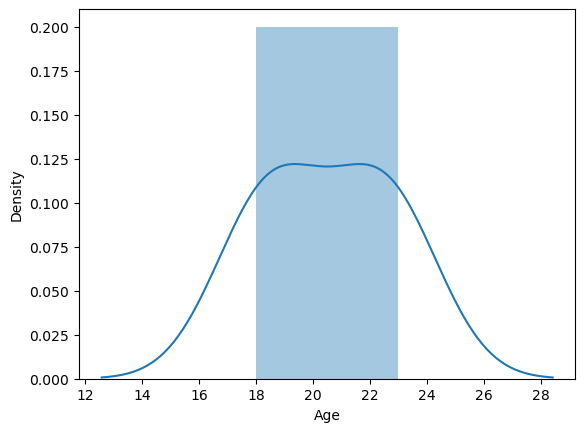

In [16]:
sns.distplot(USA["Age"])

In [ ]:
# from above visual analysis we can say USA has higher density people from age group 18-23 
# simillarly we can check for other Nationalities

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

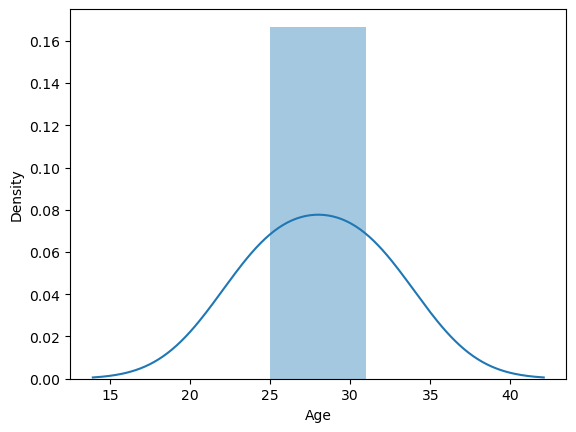

In [66]:
sns.distplot(Bangadesh["Age"])

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

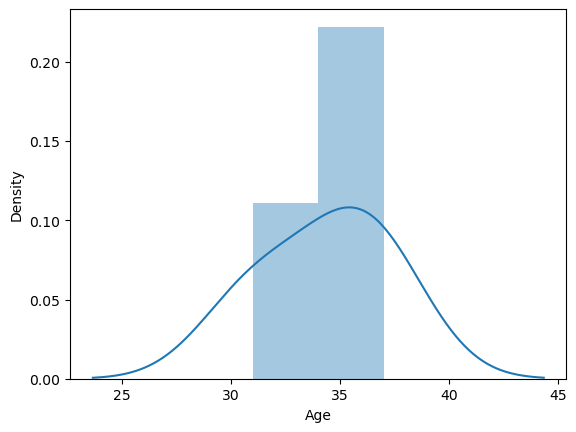

In [67]:
sns.distplot(India["Age"])

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

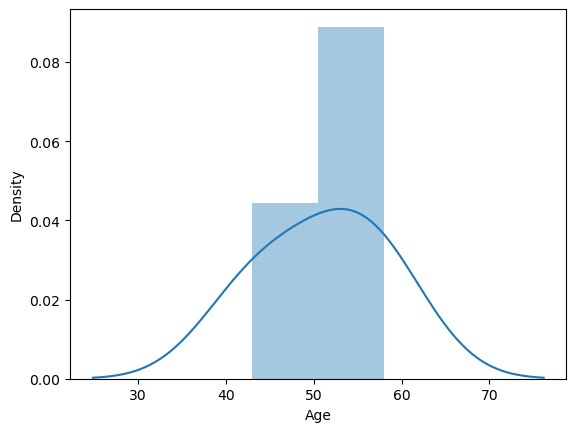

In [68]:
sns.distplot(China["Age"])

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

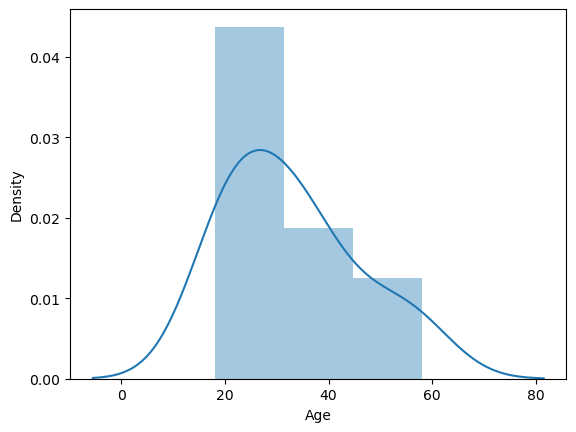

In [73]:
# If we do PDF Analysis for complete set against Age using Matplotlib
sns.distplot(data["Age"])

In [ ]:
# We can summarize that the dataset given has higher density for the age group 20-40yrs

In [ ]:
# Further Analysis can be done using Seaborn displot() as this can directly be applied over complete data set
# taking hue as various categorical data columns
# So this will act as bi-variant Analysis

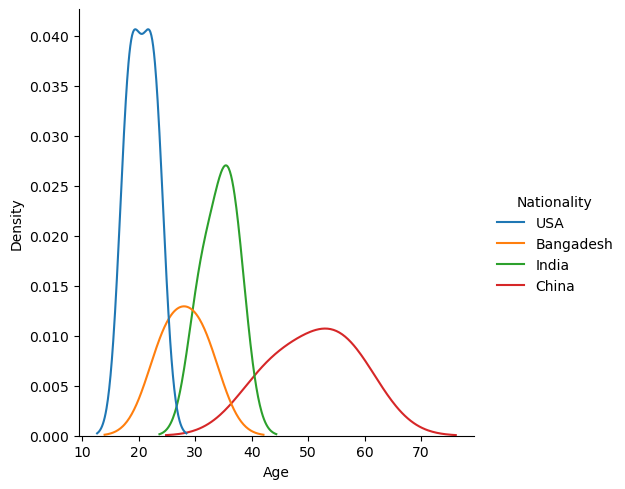

In [56]:
# PDF Analysis on Age applied over different Nationalities
sns.displot(data=datac,x="Age",hue="Nationality",kind="kde")

In [ ]:
# We can summarize that density is high for USA people of age around 20, compared to bangladesh of age 25, Indians of age 35
# and Chinese of age of 50

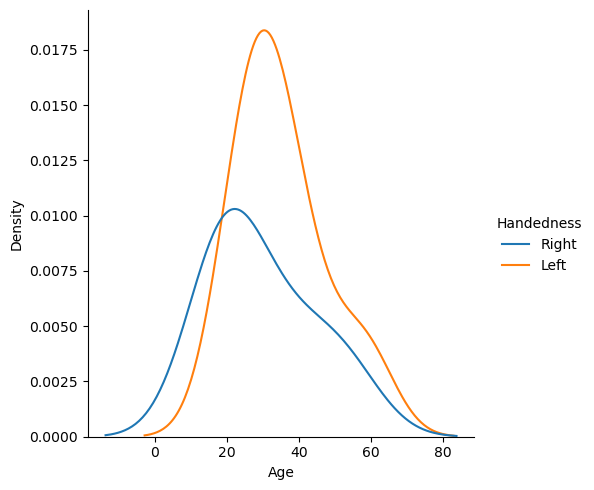

In [69]:
# PDF Analysis on Age applied over Left hand or Right hand
sns.displot(data=datac,x="Age",hue="Handedness",kind="kde")

In [ ]:
# We can summarize that in give dataset people around 20 have higher probability of being right handed and people around 30 
# have higher probability of being right handed

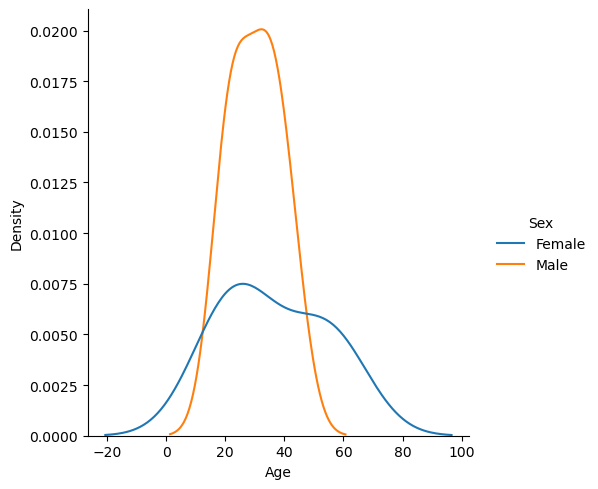

In [70]:
# PDF Analysis on Age applied over different Genders
sns.displot(data=datac,x="Age",hue="Sex",kind="kde")

In [ ]:
# We can summarize that we are given a data set where males are in smaller Age range compared to females 
# and density of males is higher than female

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nationality', ylabel='count'>

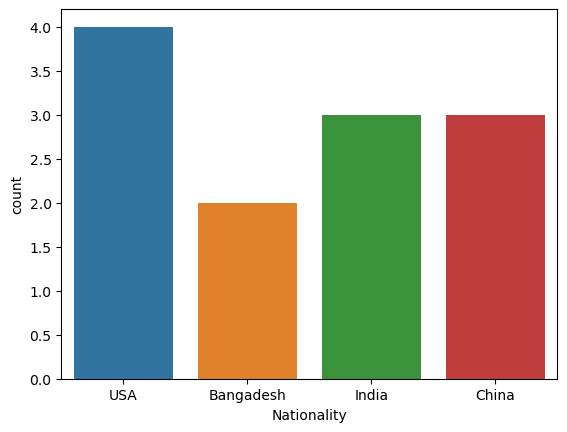

In [58]:
# Count plots are used in categorical data so here we can use count plots to analyze all the categorical columns
sns.countplot(datac["Nationality"])

In [ ]:
# We can summarize that data set has equal Indians and Chinese, Americans are greater and bangladesh people are less

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Handedness', ylabel='count'>

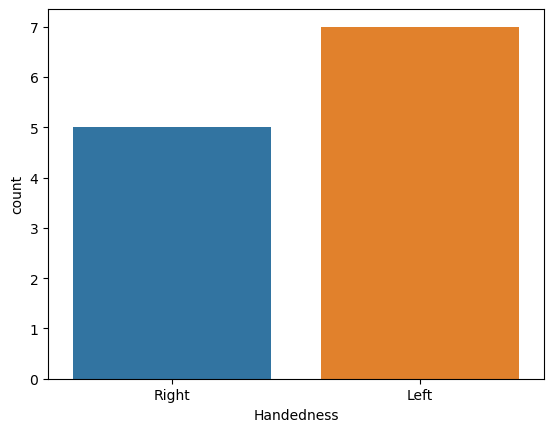

In [59]:
sns.countplot(datac["Handedness"])

In [ ]:
# We can summarize that dataset has more left handed people compared to right handed people

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

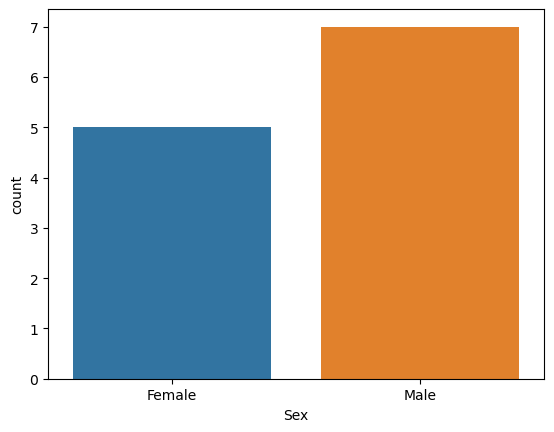

In [60]:
sns.countplot(datac["Sex"])

In [ ]:
# We can summarize that dataset has more males compared to females

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

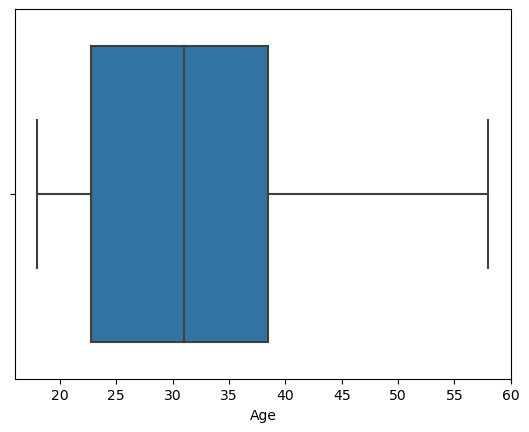

In [64]:
# boxplot visually shows that there are no outliers in the given dataset
sns.boxplot(datac["Age"])

<AxesSubplot:xlabel='Nationality', ylabel='Age'>

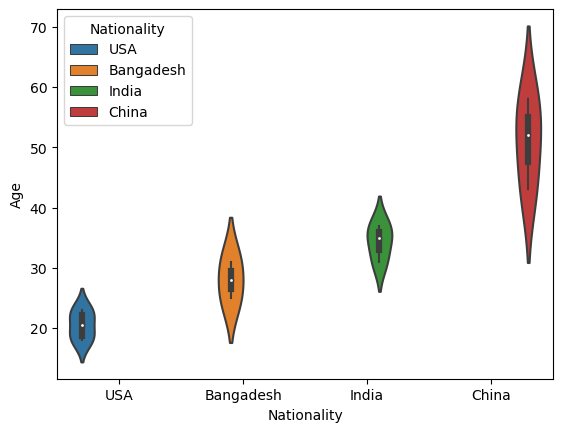

In [75]:
# We can use seaborn plot to analyze Numerical column "Age" against all the categorical columns
sns.violinplot(data=datac,y="Age",x="Nationality",hue="Nationality",size=10)

In [ ]:
# We see that there is a lot of overlap in all the violin plots

<AxesSubplot:xlabel='Sex', ylabel='Age'>

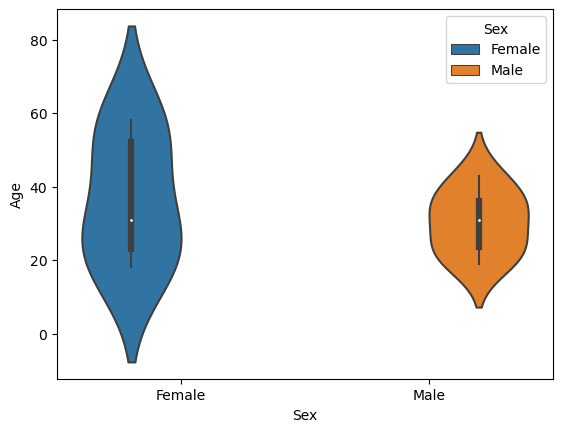

In [72]:
sns.violinplot(data=datac,y="Age",x="Sex",hue="Sex",size=10)

<AxesSubplot:xlabel='Handedness', ylabel='Age'>

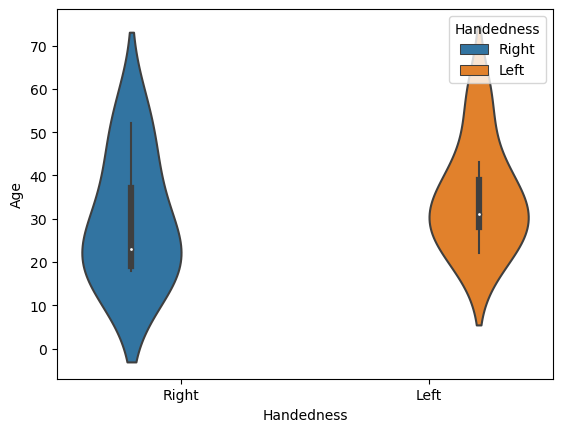

In [73]:
sns.violinplot(data=datac,y="Age",x="Handedness",hue="Handedness",size=10)

<AxesSubplot:xlabel='Age', ylabel='Count'>

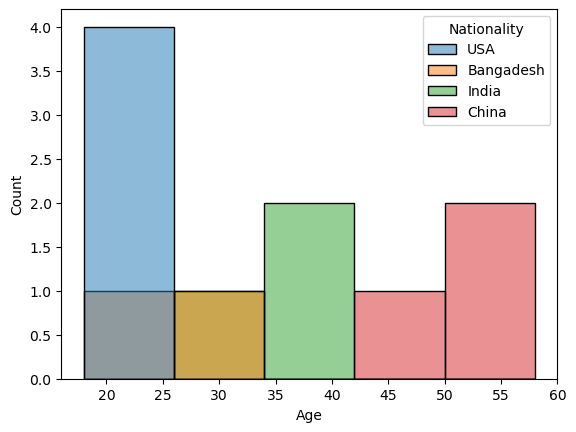

In [75]:
# We can also plot histogram with hue as categorical columns for bi-variant analysis
# here also there is a lot of overlap
sns.histplot(data=datac,x="Age",hue="Nationality")

<AxesSubplot:xlabel='Age', ylabel='Count'>

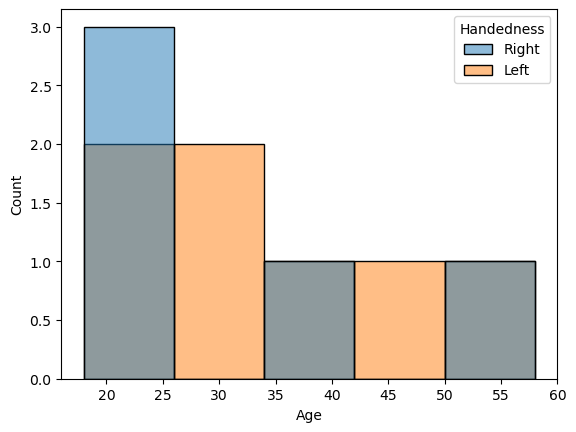

In [76]:
sns.histplot(data=datac,x="Age",hue="Handedness")

<AxesSubplot:xlabel='Age', ylabel='Count'>

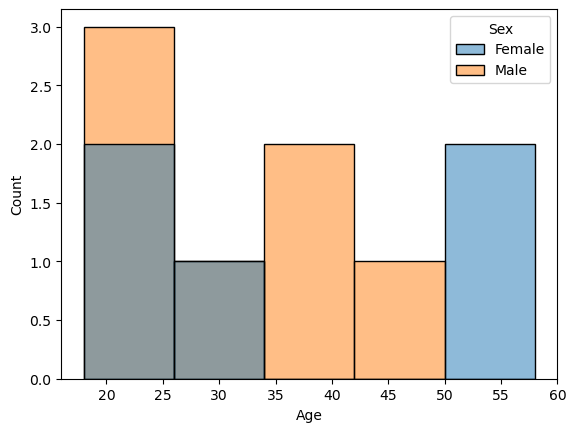

In [77]:
sns.histplot(data=datac,x="Age",hue="Sex")